# Model 2

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalMaxPooling2D
from keras.models import Model

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False) # creating Base model

In [3]:
CLASSES = 2                   
x = base_model.output
x = GlobalMaxPooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
model.summary()    # Model Summary

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [5]:
len(base_model.layers)

311

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
train_dir = 'data/train'  # training image directory

In [9]:
validation_dir = 'data/validation'   # validation image directory

In [10]:
img_size = 150
Batch_Size = 20

In [11]:
# Creating  Data Generator for training set.
from keras.applications.inception_v3 import preprocess_input   # importing  preprocess_input
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
# Creating  Data Generator for test set.

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size= Batch_Size,
        classes = ['mask', 'no mask'])

Found 93 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=Batch_Size,
        classes = ['mask', 'no mask'])

Found 18 images belonging to 2 classes.


In [16]:
EPOCHS = 10
STEPS_PER_EPOCH = 200
VALIDATION_STEPS = 50
MODEL_FILE2 = 'filename.model2'
history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE2)

Epoch 1/10


/home/rakesh0035123/anaconda3/envs/MyEnvi/lib/python3.6/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 122s 611ms/step - loss: 0.8165 - accuracy: 0.6965 - val_loss: 1.0129 - val_accuracy: 0.7778
Epoch 2/10
200/200 [==============================] - 116s 582ms/step - loss: 0.5538 - accuracy: 0.7968 - val_loss: 0.9835 - val_accuracy: 0.7689
Epoch 3/10
200/200 [==============================] - 116s 578ms/step - loss: 0.4785 - accuracy: 0.8250 - val_loss: 0.4730 - val_accuracy: 0.8667
Epoch 4/10
200/200 [==============================] - 115s 577ms/step - loss: 0.4645 - accuracy: 0.8306 - val_loss: 0.7966 - val_accuracy: 0.8600
Epoch 5/10
200/200 [==============================] - 115s 577ms/step - loss: 0.4339 - accuracy: 0.8430 - val_loss: 2.5550 - val_accuracy: 0.7756
Epoch 6/10
200/200 [==============================] - 116s 578ms/step - loss: 0.4359 - accuracy: 0.8411 - val_loss: 0.9773 - val_accuracy: 0.8256
Epoch 7/10
200/200 [==============================] - 115s 576ms/step - loss: 0.3992 - accuracy: 0.8618 - val_loss: 1.4165 - val_accura

In [46]:
pred=model.predict_generator(validation_generator,verbose=1)

1/1 [==============================] - 1s 669ms/step


In [49]:
pred=model.predict_generator(validation_generator,verbose=1)
print(pred)

1/1 [==============================] - 1s 653ms/step
[[7.4641269e-01 2.5358739e-01]
 [9.0027666e-01 9.9723272e-02]
 [1.0000000e+00 3.0780641e-17]
 [1.0000000e+00 9.1146996e-15]
 [1.0000000e+00 4.6801856e-17]
 [9.9934357e-01 6.5644726e-04]
 [1.0000000e+00 9.9815121e-13]
 [1.0000000e+00 1.0857440e-12]
 [1.0000000e+00 4.5564291e-10]
 [1.0437402e-07 9.9999988e-01]
 [8.3466297e-01 1.6533707e-01]
 [1.1852604e-06 9.9999881e-01]
 [9.9990451e-01 9.5489377e-05]
 [1.0693041e-05 9.9998927e-01]
 [5.0631306e-06 9.9999499e-01]
 [2.9632780e-03 9.9703670e-01]
 [9.9536359e-01 4.6363478e-03]
 [9.5636016e-01 4.3639828e-02]]


In [50]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0]


In [51]:
labels = (validation_generator.class_indices)
labels

{'mask': 0, 'no mask': 1}

In [52]:
filenames=validation_generator.filenames

In [53]:
filenames

['mask/1.91V9Btv8YJL._AC_SY741_.jpg',
 'mask/10.delhi-school-children-masks-afp_650x400_81510044353.jpg',
 'mask/11.75625-clafbmnmoq-1512395954.jpg',
 'mask/2.66556579.jpg',
 'mask/3.848655753.jpg',
 'mask/4.max-compact-and-light-weight-half-mask-respirator-mask-for-original-imaewhvafemqa94d.jpeg',
 'mask/5.gills-advanced-air-pollution-mask-max-500x500.jpg',
 'mask/6.858300787.jpg',
 'mask/7.anti-pollution-masks-500x500.png',
 'mask/8.mask.jpg',
 'no mask/1.photo-1477724902304-4d75535625a01.jpg',
 'no mask/2.david-lieb.png',
 'no mask/2.group-people-multi-ethnic-isolated-32199411.jpg',
 'no mask/4.2200db70bd2ef02bfa1ec925c5308209.jpg',
 'no mask/5.Individual-Change-Agents-367x235.jpg',
 'no mask/6.image.jpg',
 'no mask/7.group-of-people-1.jpg',
 'no mask/8.shutterstock_623123291.jpg']

In [54]:
x = 'no mask'

actuals= []
for st in filenames:
    actuals.append(x in st)

print(actuals)

[False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True]


In [55]:
from sklearn.metrics import confusion_matrix, classification_report # importing confusion_matrix and classification_report.

print(confusion_matrix(actuals, predicted_class_indices))
print(classification_report(actuals,predicted_class_indices))

[[9 1]
 [4 4]]
              precision    recall  f1-score   support

       False       0.69      0.90      0.78        10
        True       0.80      0.50      0.62         8

    accuracy                           0.72        18
   macro avg       0.75      0.70      0.70        18
weighted avg       0.74      0.72      0.71        18



# SAMPLE PREDICTION TEST

99.99991655349731% has not have Mask


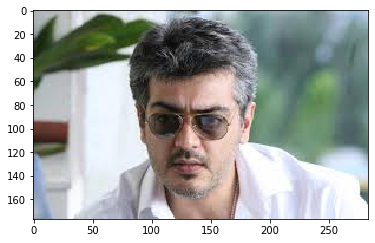

In [70]:
from keras.preprocessing import image
from keras.models import load_model
def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]
 

img = image.load_img('sample/download1.jpg', target_size=(150, 150))
preds = predict(load_model(MODEL_FILE2), img)
import matplotlib.image as mpimg
per = preds[1] * 100
per = str(per)
print(per + '% has not have Mask')
img2 = mpimg.imread('sample/download1.jpg')
imgplot = plt.imshow(img2)
plt.show()   # Plotting

0.00014336752656163299% has not have Mask


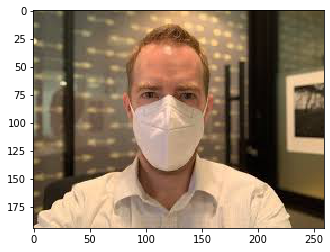

In [72]:
from keras.preprocessing import image
from keras.models import load_model
def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]
 

img = image.load_img('sample/images.jpg', target_size=(150, 150))
preds = predict(load_model(MODEL_FILE2), img)
import matplotlib.image as mpimg
per = preds[1] * 100
per = str(per)
print(per + '% has not have Mask')
img2 = mpimg.imread('sample/images.jpg')
imgplot = plt.imshow(img2)
plt.show()    # Plotting

CONCLUSION:


Therefore the current model can differentiate the people with having mask or no mask to an accurate percentage.